In [1]:
import sys
sys.path.append("..")

import pandas as pd

from src.utils.paths import DATA_DIR

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## データの読み込み

In [2]:
input_path = DATA_DIR / "input" / "breakfast"
transaction_df = pd.read_csv(str(input_path / "transaction.csv"))  # 購買データ
product_df = pd.read_csv(str(input_path / "product.csv"))  # 商品データ

In [3]:
transaction_df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,14-1月-09,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,14-1月-09,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0
2,14-1月-09,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
3,14-1月-09,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1
4,14-1月-09,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0


In [4]:
product_df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


## 店舗・商品カテゴリごとの売上数を集計

In [5]:
transaction_product_df = transaction_df.merge(product_df, on="UPC", how="left")
transaction_grouped_df = pd.DataFrame(
    transaction_product_df.groupby(["STORE_NUM", "CATEGORY"])
    .sum()["UNITS"]
    .sort_values(ascending=False)
).reset_index()

In [6]:
transaction_grouped_df.head(30)

,STORE_NUM,CATEGORY,UNITS
0,25027,COLD CEREAL,194033
1,2277,COLD CEREAL,183025
2,24991,COLD CEREAL,152909
3,2281,COLD CEREAL,140853
4,9825,COLD CEREAL,139252
5,389,COLD CEREAL,129369
6,2277,BAG SNACKS,123812
7,21227,COLD CEREAL,121753
8,21237,COLD CEREAL,119236
9,19265,COLD CEREAL,116083


## 価格と需要を可視化

In [7]:
TARGET_STORE_NUM = 25027
TARGET_CATEGORY = "COLD CEREAL"
transaction_product_df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,14-1月-09,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,14-1月-09,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,14-1月-09,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,14-1月-09,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,14-1月-09,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [8]:
df = transaction_product_df.query(
    "STORE_NUM == @TARGET_STORE_NUM and CATEGORY == @TARGET_CATEGORY"
).reset_index(drop=True)[["PRICE", "UNITS", "DESCRIPTION", "MANUFACTURER"]]

In [9]:
df.head()

,PRICE,UNITS,DESCRIPTION,MANUFACTURER
0,1.85,50,PL HONEY NUT TOASTD OATS,PRIVATE LABEL
1,1.88,69,PL RAISIN BRAN,PRIVATE LABEL
2,1.98,100,PL BT SZ FRSTD SHRD WHT,PRIVATE LABEL
3,2.87,70,GM HONEY NUT CHEERIOS,GENERAL MI
4,4.39,69,GM CHEERIOS,GENERAL MI


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='PRICE', ylabel='UNITS'>

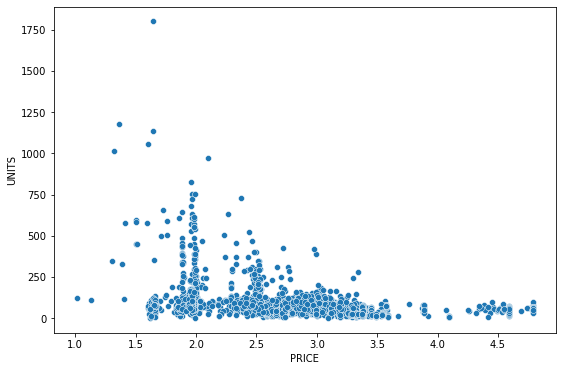

In [11]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='PRICE', y='UNITS', data=df)

<AxesSubplot:xlabel='PRICE', ylabel='UNITS'>

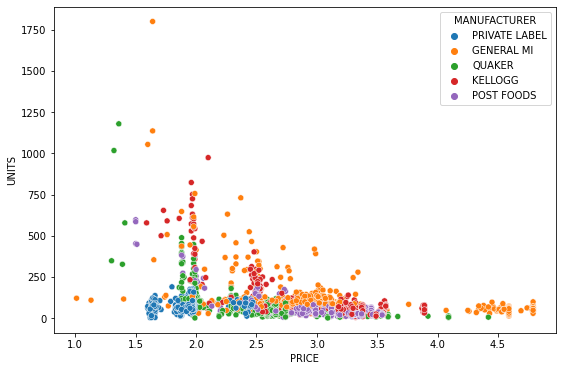

In [12]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='PRICE', y='UNITS', hue='MANUFACTURER', data=df)

<AxesSubplot:xlabel='PRICE', ylabel='UNITS'>

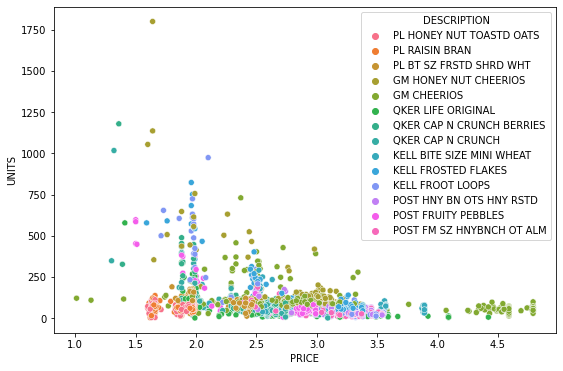

In [13]:

plt.figure(figsize=(9,6))
sns.scatterplot(x='PRICE', y='UNITS', hue='DESCRIPTION', data=df)